In [1]:
x=[162,212,220,206,152,183,167,175,156,186,183,163,163,172,194,168,161,164,188,187,162,192,184,206,175,154,187,212,195,205]
y=[68.78,74.11,71.73,69.88,67.25,68.78,68.34,67.01,63.45,71.19,67.19,65.80,64.30,67.97,72.18,65.27,66.09,67.51,70.10,68.25,67.89,68.14,69.08,72.80,67.42,68.49,68.61,74.03,71.52,69.18]

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
n=len(y)
n

30

In [4]:
x=np.array(x)
y=np.array(y)
y

array([68.78, 74.11, 71.73, 69.88, 67.25, 68.78, 68.34, 67.01, 63.45,
       71.19, 67.19, 65.8 , 64.3 , 67.97, 72.18, 65.27, 66.09, 67.51,
       70.1 , 68.25, 67.89, 68.14, 69.08, 72.8 , 67.42, 68.49, 68.61,
       74.03, 71.52, 69.18])

In [29]:
sumx=sum(x)
sumy=sum(y)
sumx2=sum(x**2)
sumy2=sum(y**2)
sumxy=sum(x*y)

promx=sumx/n
promy=sumy/n

sumx

5434

In [31]:
#calculo Ecuación del modelo lineal
m=((sumx*sumy-n*sumxy))/(sumx**2-n*sumx2)
b=promy-(m*promx)

m,b

(0.10861078195357493, 49.07163369547579)

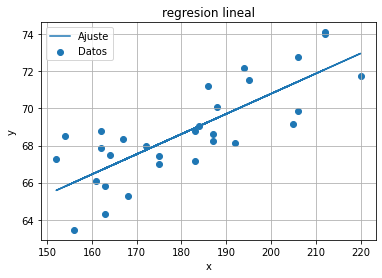

In [34]:
plt.scatter(x,y,label="Datos")
plt.plot(x,b+m*x,label="Ajuste")
plt.xlabel('x')
plt.ylabel('y')
plt.title('regresion lineal')
plt.grid()
plt.legend()
plt.show()

In [1]:
def Load_data():
    baskets_data = [
        ['A', 'B', 'C', 'E'],
        ['B', 'E'],
        ['C', 'D', 'E'],
        ['A', 'C', 'D'],
        ['A', 'C', 'E'],
    ]
    return baskets_data

In [2]:
def createC1(data):

    C1 = []
    for transaction in data:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
    C1.sort()
    
    return [set(x) for x in C1]

In [3]:
def createCk(Lk, k):

    cand_list = []
    len_Lk = len(Lk)
    
 
    for i in range(len_Lk):
        for j in range(i+1, len_Lk):
            L1 = list(Lk[i])[:k-2]
            L2 = list(Lk[j])[:k-2]
            L1.sort()
            L2.sort()
            if L1==L2:
                cand_list.append(Lk[i] | Lk[j])
    
    return cand_list

In [4]:
def scanD(data, Ck, min_support):
    
    count = {}
    for transaction in data:
        tr = set(transaction)
        for candidate in Ck:
            if candidate.issubset(tr):
                can = frozenset(candidate)
                if can not in count:
                    count[can] = 1
                else:
                    count[can] += 1
                    num_items = float(len(D))
    
    cand_list = []
    support_data = {}
    

    for key in count:
        support = count[key]/num_items
        

        if support >= min_support:
            cand_list.insert(0, key)
        support_data[key] = support
    
    return cand_list, support_data

In [5]:
min_support = 0.5

In [6]:
data = Load_data()
data

[['A', 'B', 'C', 'E'],
 ['B', 'E'],
 ['C', 'D', 'E'],
 ['A', 'C', 'D'],
 ['A', 'C', 'E']]

In [7]:
C1 = createC1(data)
C1

[{'A'}, {'B'}, {'C'}, {'D'}, {'E'}]

In [8]:
D = list(map(set, data))
D

[{'A', 'B', 'C', 'E'},
 {'B', 'E'},
 {'C', 'D', 'E'},
 {'A', 'C', 'D'},
 {'A', 'C', 'E'}]

In [9]:
L1, support_data1 = scanD(D, C1, min_support)
L1

[frozenset({'E'}), frozenset({'C'}), frozenset({'A'})]

In [10]:
support_data1

{frozenset({'A'}): 0.6,
 frozenset({'B'}): 0.4,
 frozenset({'C'}): 0.8,
 frozenset({'E'}): 0.8,
 frozenset({'D'}): 0.4}

In [11]:
C2 = createCk(L1, k=2)
C2

[frozenset({'C', 'E'}), frozenset({'A', 'E'}), frozenset({'A', 'C'})]

In [12]:
L2, support_data2 = scanD(D, C2, min_support)
L2

[frozenset({'A', 'C'}), frozenset({'C', 'E'})]

In [13]:
support_data2

{frozenset({'C', 'E'}): 0.6,
 frozenset({'A', 'E'}): 0.4,
 frozenset({'A', 'C'}): 0.6}

In [14]:
C3 = createCk(L2, k=3)
C3

[]

In [15]:
L3, support_data3 = scanD(D, C3, min_support)
L3

[]

In [16]:
support_data3

{}